<a href="https://colab.research.google.com/github/chhavic4004/-gdi2019-/blob/main/gdi%20using%20ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
gdi_df = pd.read_csv("GDI.csv")

In [3]:
# Remove the first row if it contains year labels
gdi_df = gdi_df.iloc[1:].reset_index(drop=True)

In [4]:
# Convert necessary columns to numeric, handling commas in GNI columns
numeric_cols = ['HDI Rank', 'GDI_Value', 'HDI_Female', 'HDI_Male', 'Lif_Expec_Female',
                'Lif_Excep_Male', 'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male',
                'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male', 'GNI_PC_Female', 'GNI_PC_Male']

In [5]:
def clean_numeric(value):
    if isinstance(value, str):
        return float(value.replace(',', '')) if value.replace(',', '').replace('.', '').isdigit() else np.nan
    return value

In [6]:
for col in numeric_cols:
    gdi_df[col] = gdi_df[col].apply(clean_numeric)

In [7]:
# Handling missing values (simple approach: filling with median)
gdi_df.fillna(gdi_df.median(numeric_only=True), inplace=True)

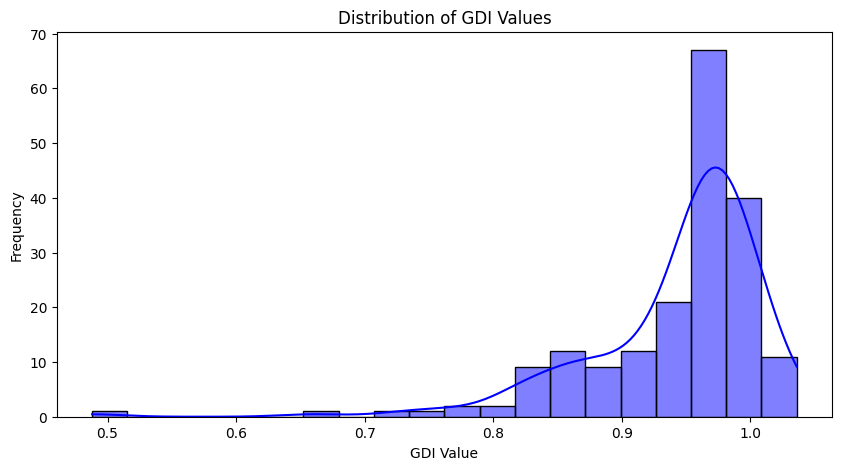

In [8]:
# Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(gdi_df['GDI_Value'], bins=20, kde=True, color='blue')
plt.title('Distribution of GDI Values')
plt.xlabel('GDI Value')
plt.ylabel('Frequency')
plt.show()

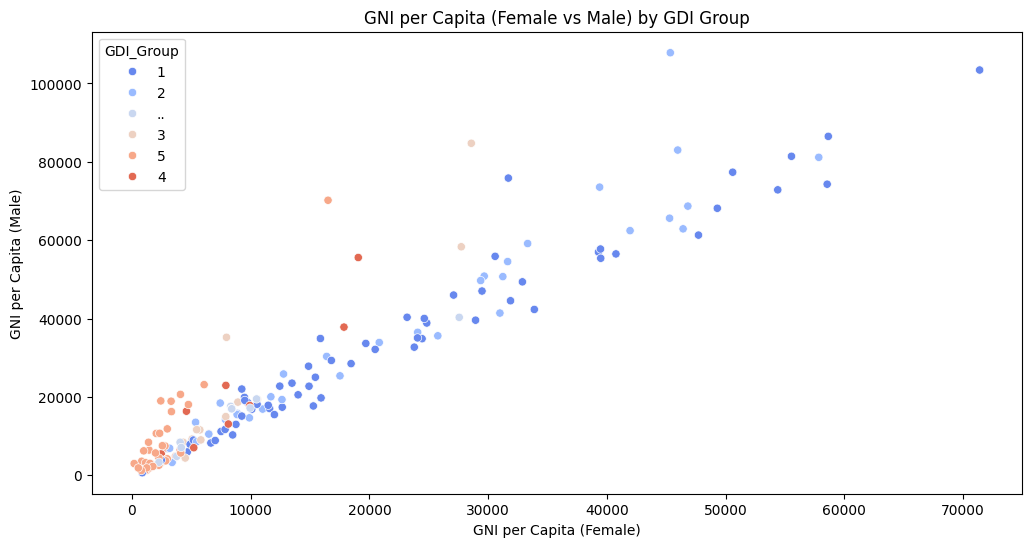

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=gdi_df['GNI_PC_Female'], y=gdi_df['GNI_PC_Male'], hue=gdi_df['GDI_Group'], palette='coolwarm')
plt.title('GNI per Capita (Female vs Male) by GDI Group')
plt.xlabel('GNI per Capita (Female)')
plt.ylabel('GNI per Capita (Male)')
plt.show()

<ipython-input-10-6e2f38aa5226>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GDI_Group', y='HDI_Female', data=gdi_df, palette='pastel')


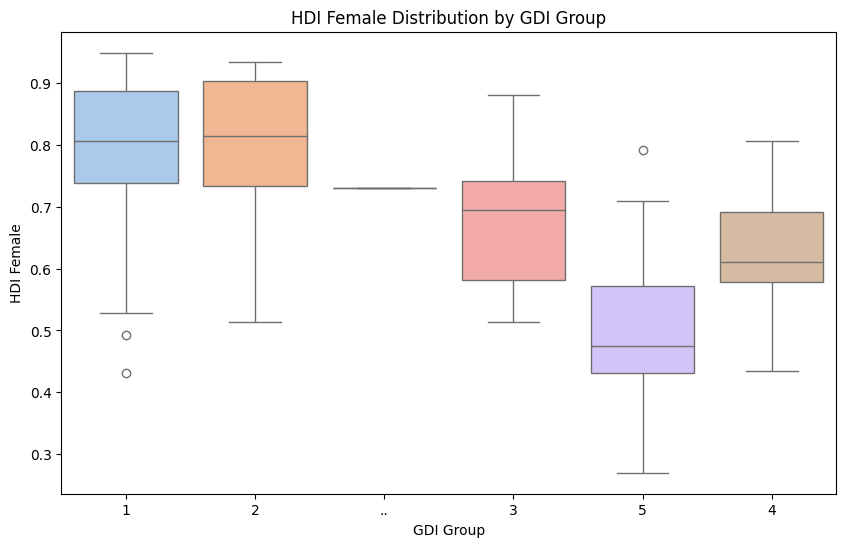

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GDI_Group', y='HDI_Female', data=gdi_df, palette='pastel')
plt.title('HDI Female Distribution by GDI Group')
plt.xlabel('GDI Group')
plt.ylabel('HDI Female')
plt.show()

<ipython-input-11-120fe9c32f08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GDI_Group', y='HDI_Male', data=gdi_df, palette='muted')


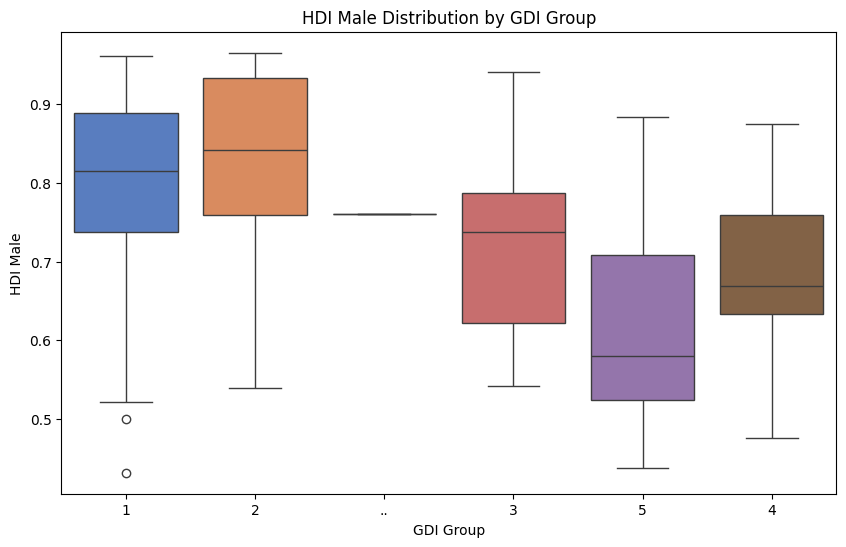

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GDI_Group', y='HDI_Male', data=gdi_df, palette='muted')
plt.title('HDI Male Distribution by GDI Group')
plt.xlabel('GDI Group')
plt.ylabel('HDI Male')
plt.show()

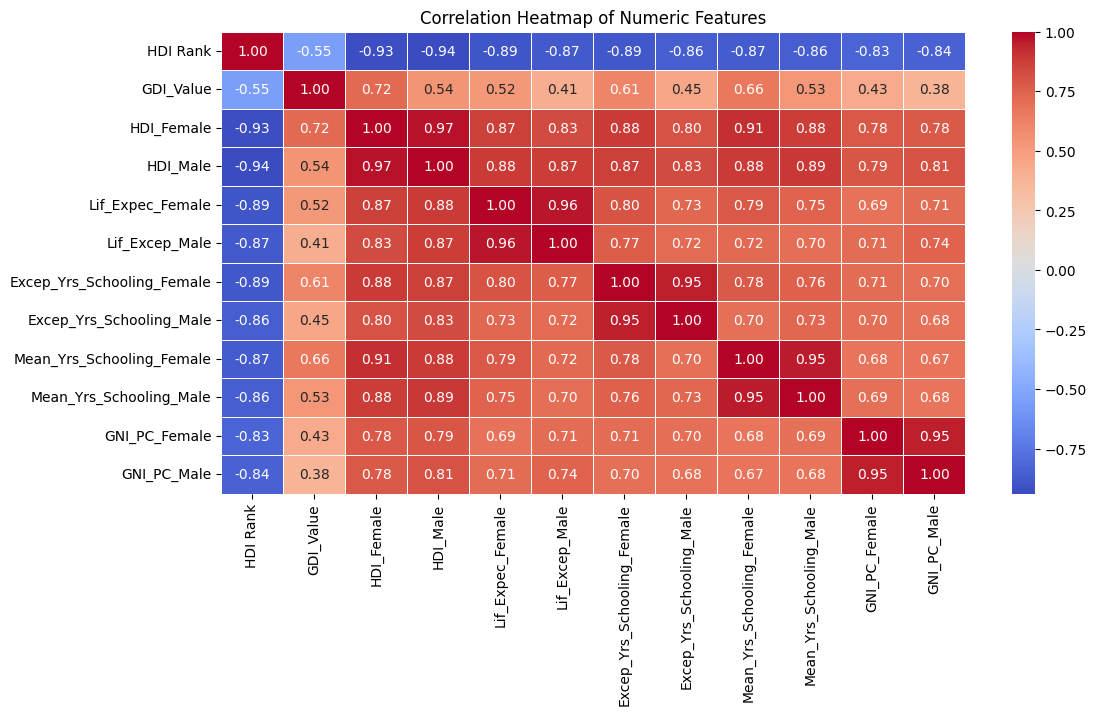

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(gdi_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [13]:
# Save the cleaned dataset
gdi_df.to_csv("GDI_Cleaned.csv", index=False)
